## Projet 5 : Segmentez des clients d'un site e-commerce

In [5]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
df = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/new_df.csv')

In [7]:
df.head(5)

,customer_unique_id,nombre_achat_par_client,achat_moy,note,payment_type,payment_installments,customer_city,customer_state,delai_commande,jour_achat,heure_de_achat,longeur_du_commentaire,product_category_name
0,0000366f3b9a7992bf8c76cfdf3221e2,1,129.90,5.0,credit_card,8.0,cajamar,SP,6 days 09:52:10.000000000,3,10,111.0,maison
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,18.90,4.0,credit_card,1.0,osasco,SP,3 days 06:51:15.000000000,0,11,8.0,produit_de_beauté
2,0000f46a3911fa3c0805444483337064,1,69.00,3.0,credit_card,8.0,sao jose,SC,25 days 17:33:44.000000000,4,21,8.0,autre
3,0000f6ccb0745a6a4b88665a16c9f078,1,25.99,4.0,credit_card,4.0,belem,PA,20 days 00:53:24.000000000,3,20,12.0,technologie
4,0004aac84e0df4da2b147fca70cf8255,1,180.00,5.0,credit_card,6.0,sorocaba,SP,13 days 03:23:14.000000000,1,19,8.0,technologie


In [8]:
df.dtypes

customer_unique_id          object
nombre_achat_par_client      int64
achat_moy                  float64
note                       float64
payment_type                object
payment_installments       float64
customer_city               object
customer_state              object
delai_commande              object
jour_achat                   int64
heure_de_achat               int64
longeur_du_commentaire     float64
product_category_name       object
dtype: object

In [9]:
X = df
df_reduit = df.sample(10000, random_state=1).copy()
X = df_reduit.copy()

In [10]:
X = X.drop(['customer_state','customer_city',
            'customer_unique_id','delai_commande'],axis=1) 
## donne trop de colonnes quantitatives

In [11]:
X['achat_moy'] = np.log2(1+X['achat_moy'])
X['note'] = np.log2(1+X['note'])
X['jour_achat'] = np.log2(1+X['jour_achat'])
X['heure_de_achat'] = np.log2(1+X['heure_de_achat'])
X['payment_installments'] = np.log2(1+X['payment_installments'])
X['nombre_achat_par_client'] = np.log2(1+X['nombre_achat_par_client'])
X['longeur_du_commentaire'] = np.log2(1+X['longeur_du_commentaire'])

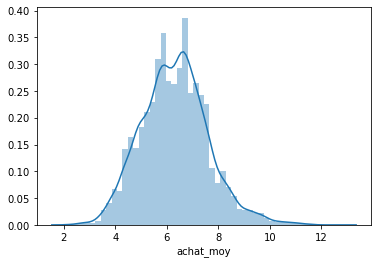

In [12]:
sns.distplot(X['achat_moy'])

In [13]:
X_init = X.copy()

In [14]:
X_init

,nombre_achat_par_client,achat_moy,note,payment_type,payment_installments,jour_achat,heure_de_achat,longeur_du_commentaire,product_category_name
7869,1.0,5.672142,1.000000,boleto,1.000000,1.584963,4.459432,7.672425,technologie
59502,1.0,7.459350,2.584963,credit_card,1.000000,2.807355,3.807355,4.906891,technologie
16356,1.0,3.884598,2.584963,boleto,1.000000,1.584963,4.584963,3.169925,technologie
4415,1.0,6.656782,2.584963,credit_card,2.000000,2.807355,4.087463,5.459432,animaux
19140,1.0,4.906891,2.584963,boleto,1.000000,2.584963,4.459432,3.169925,technologie
...,...,...,...,...,...,...,...,...,...
33872,1.0,9.552669,1.000000,credit_card,3.459432,2.321928,4.000000,5.459432,électroménagers
27876,1.0,6.599913,2.584963,credit_card,1.584963,1.000000,4.087463,3.169925,sport
48581,1.0,5.669594,2.584963,credit_card,1.000000,0.000000,4.087463,3.169925,électroménagers
53835,1.0,5.906891,2.000000,credit_card,1.000000,2.000000,3.906891,3.169925,voiture


#### transformer les variables

qualitatives (onehotencoder) et quantitatives (standarscaler)

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

categorical_columns = X.select_dtypes(include=['category','object']).columns
numerical_columns = X.select_dtypes(include=['int64','float64']).columns

ohe = OneHotEncoder(sparse=False)
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])
ohe.fit(X[categorical_columns])

OneHotEncoder(sparse=False)

In [16]:
X = pd.merge(X[numerical_columns], 
          pd.DataFrame(columns = ohe.get_feature_names().tolist(),
              data = ohe.fit_transform(X[categorical_columns])).set_index(X.index),
        left_index = True, right_index = True)

In [17]:
X.columns

Index(['nombre_achat_par_client', 'achat_moy', 'note', 'payment_installments',
       'jour_achat', 'heure_de_achat', 'longeur_du_commentaire', 'x0_boleto',
       'x0_credit_card', 'x0_debit_card', 'x0_voucher', 'x1_animaux',
       'x1_autre', 'x1_bureau', 'x1_culture', 'x1_maison', 'x1_mode',
       'x1_musique', 'x1_nourriture', 'x1_oultil', 'x1_produit_de_beauté',
       'x1_sport', 'x1_technologie', 'x1_voiture', 'x1_électroménagers'],
      dtype='object')

In [18]:
X.head(2)

,nombre_achat_par_client,achat_moy,note,payment_installments,jour_achat,heure_de_achat,longeur_du_commentaire,x0_boleto,x0_credit_card,x0_debit_card,...,x1_maison,x1_mode,x1_musique,x1_nourriture,x1_oultil,x1_produit_de_beauté,x1_sport,x1_technologie,x1_voiture,x1_électroménagers
7869,-0.367873,-0.494475,-2.658787,-0.848915,-0.080963,0.764828,2.370558,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59502,-0.367873,0.884821,0.597196,-0.848915,1.239927,-0.020681,0.500182,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### PCA

In [19]:
from sklearn import preprocessing
from sklearn import decomposition

In [20]:
from sklearn import decomposition
from sklearn.decomposition import PCA
pca = PCA(random_state=1)

In [21]:
pca.fit(X)

PCA(random_state=1)

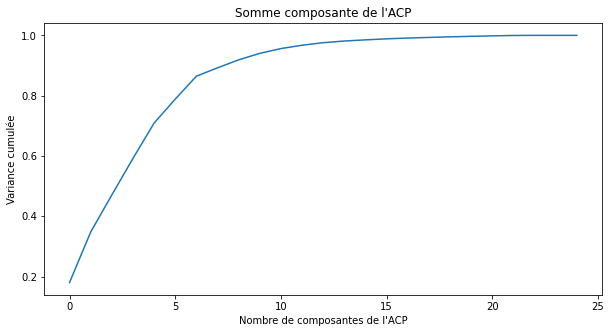

In [22]:
plt.figure(figsize=(10,5))
plt.title('Somme composante de l\'ACP')
plt.xlabel('Nombre de composantes de l\'ACP')
plt.ylabel('Variance cumulée')
plt.plot(list(range(X.shape[1])),np.cumsum(pca.explained_variance_ratio_))

In [23]:
np.cumsum(pca.explained_variance_ratio_)[17]

0.9931051761719933

#### 5 composantes commencent à être suffisant 

#### Projection sur deux dimensions du pca

In [24]:
X_projected = pca.transform(X)
print( X_projected.shape)

(10000, 25)


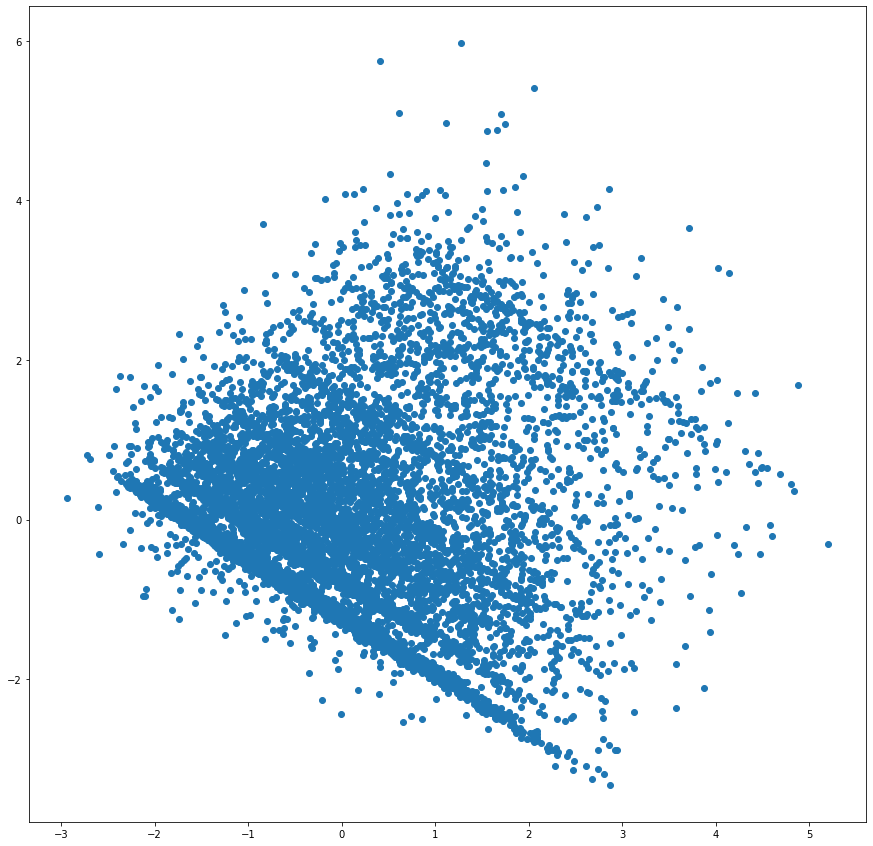

In [25]:
fig = plt.figure(figsize=(15,15))
plt.scatter(X_projected[:,0], X_projected[:,1])
#représente chaque client en deux dimensions

In [26]:
pcs = pca.components_

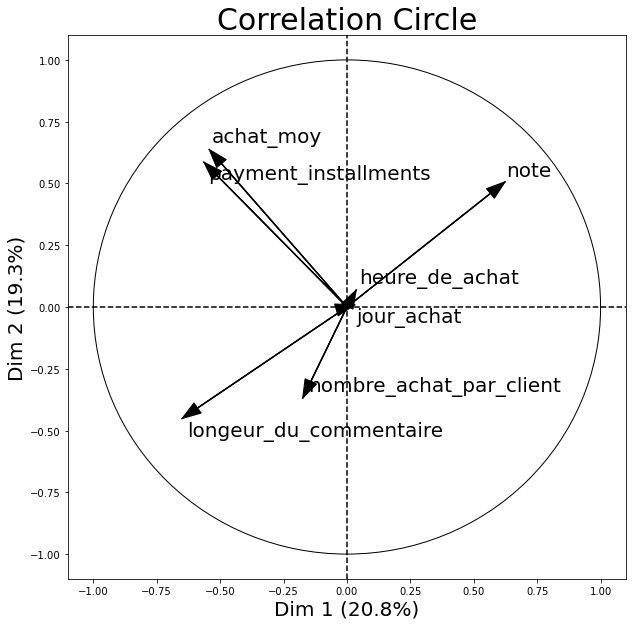

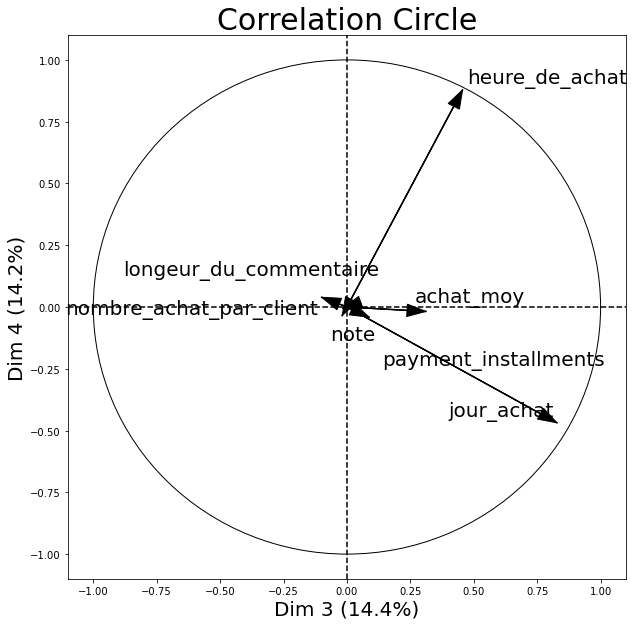

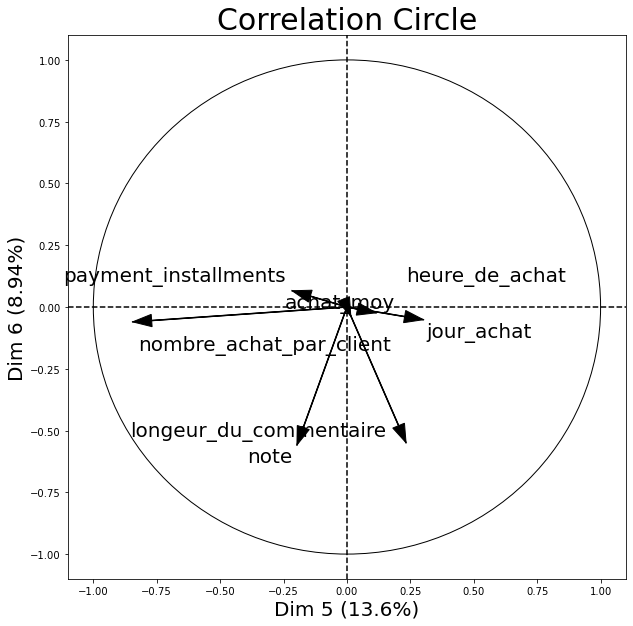

In [27]:
from mlxtend.plotting import plot_pca_correlation_graph
X_norm = X / X.std(axis=0) # Normalizing the feature columns is recommended
X_norm_reduit = X_norm[['nombre_achat_par_client', 'achat_moy', 'note', 'payment_installments',
       'jour_achat', 'heure_de_achat', 'longeur_du_commentaire']]

feature_names = ['nombre_achat_par_client', 'achat_moy', 'note', 'payment_installments',
                 'jour_achat', 'heure_de_achat','longeur_du_commentaire']
#'x0_boleto',
       #'x0_credit_card', 'x0_debit_card', 'x0_voucher', 'x1_animaux',
       #'x1_autre', 'x1_bureau', 'x1_culture', 'x1_maison', 'x1_mode',
       #'x1_musique', 'x1_nourriture', 'x1_oultil', 'x1_produit_de_beauté',
       #'x1_sport', 'x1_technologie', 'x1_voiture', 'x1_électroménagers']

figure, correlation_matrix = plot_pca_correlation_graph(X_norm_reduit, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)

figure, correlation_matrix = plot_pca_correlation_graph(X_norm_reduit, 
                                                        feature_names,
                                                        dimensions=(3, 4),
                                                        figure_axis_size=10)

figure, correlation_matrix = plot_pca_correlation_graph(X_norm_reduit, 
                                                        feature_names,
                                                        dimensions=(5, 6),
                                                        figure_axis_size=10)

#### je reprends mes valeurs de base 

In [28]:
X_init = X_init.drop(['product_category_name','payment_type'],axis=1)


In [29]:
X_init

,nombre_achat_par_client,achat_moy,note,payment_installments,jour_achat,heure_de_achat,longeur_du_commentaire
7869,1.0,5.672142,1.000000,1.000000,1.584963,4.459432,7.672425
59502,1.0,7.459350,2.584963,1.000000,2.807355,3.807355,4.906891
16356,1.0,3.884598,2.584963,1.000000,1.584963,4.584963,3.169925
4415,1.0,6.656782,2.584963,2.000000,2.807355,4.087463,5.459432
19140,1.0,4.906891,2.584963,1.000000,2.584963,4.459432,3.169925
...,...,...,...,...,...,...,...
33872,1.0,9.552669,1.000000,3.459432,2.321928,4.000000,5.459432
27876,1.0,6.599913,2.584963,1.584963,1.000000,4.087463,3.169925
48581,1.0,5.669594,2.584963,1.000000,0.000000,4.087463,3.169925
53835,1.0,5.906891,2.000000,1.000000,2.000000,3.906891,3.169925


#### Algorithmes de clustering

garder seulement les variables quantitatives pour un KMeans

#### Premier Essai avec toutes les features

In [30]:
X_norm = preprocessing.scale(X_init)

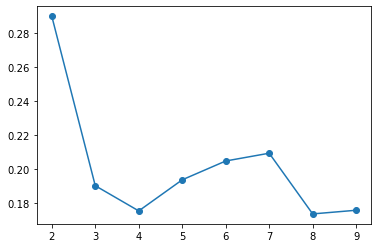

In [31]:
from sklearn import cluster, metrics 

silhouettes = []
for num_clusters in range (2,10):
    cls = cluster.KMeans(n_clusters = num_clusters,random_state=0)
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm,cls.labels_)
    silhouettes.append(silh)
    
plt.plot(range(2,10),silhouettes,marker='o')

In [32]:
silhouettes

[0.28997182973070895,
 0.19018955557962744,
 0.17534841418565753,
 0.19365904754085153,
 0.20474459011225726,
 0.20932478917319794,
 0.17358051589828744,
 0.17574064158927605]

In [33]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [34]:
def silhouette(model,df):
    print(__doc__)

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.

    pca.fit(df)
    X_pca = pca.transform(df)

    range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = model(n_clusters=n_clusters, random_state=0)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_projected[:,0], X_projected[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

plt.show()

In [35]:
model = KMeans

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.24796630596766445
For n_clusters = 3 The average silhouette_score is : 0.1499383938507551
For n_clusters = 4 The average silhouette_score is : 0.1625013515834955
For n_clusters = 5 The average silhouette_score is : 0.1706183342208206
For n_clusters = 6 The average silhouette_score is : 0.15508066136309662
For n_clusters = 7 The average silhouette_score is : 0.15619330483093463
For n_clusters = 8 The average silhouette_score is : 0.12708872236045862
For n_clusters = 9 The average silhouette_score is : 0.12941792847777198


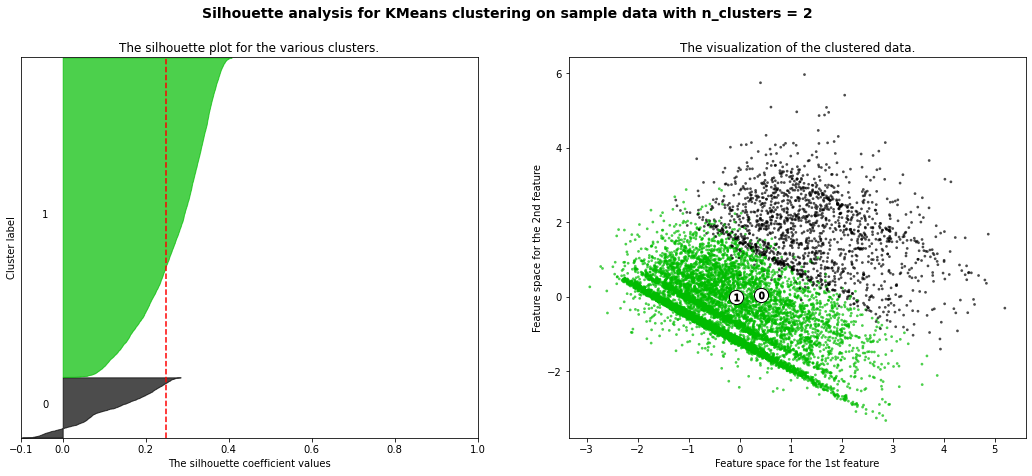

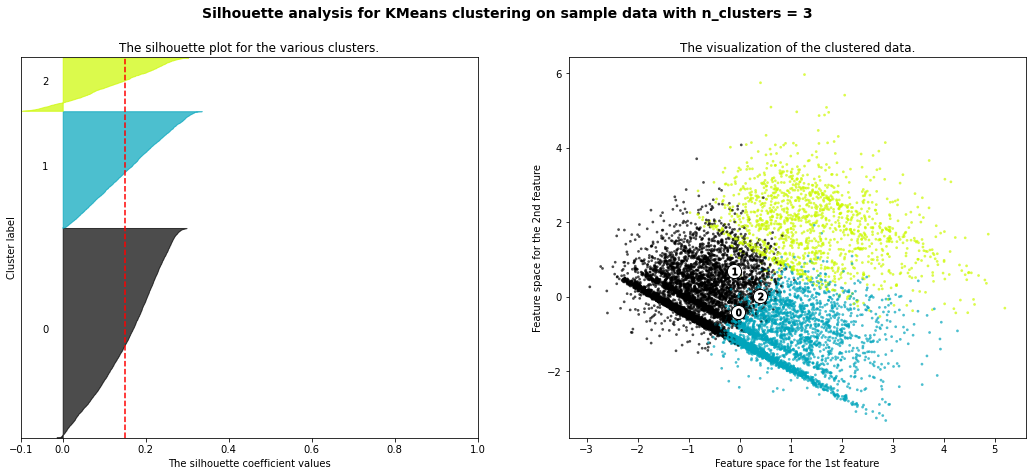

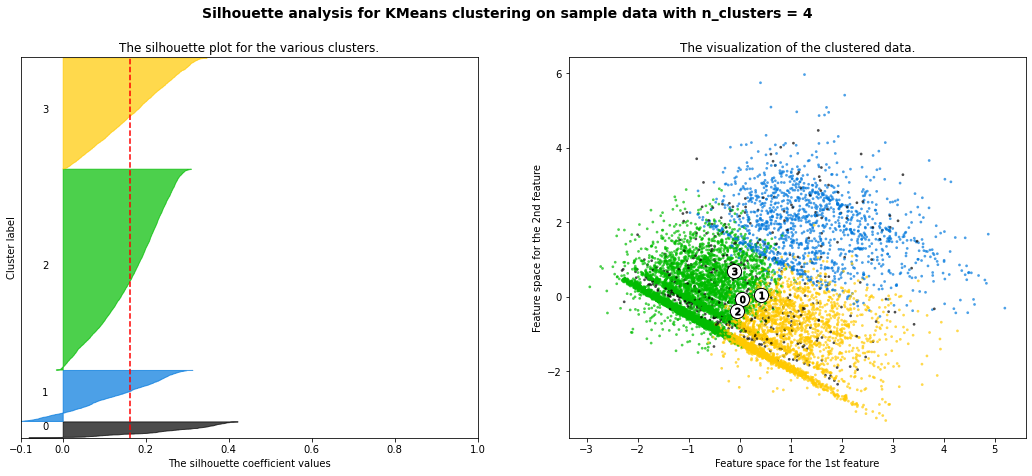

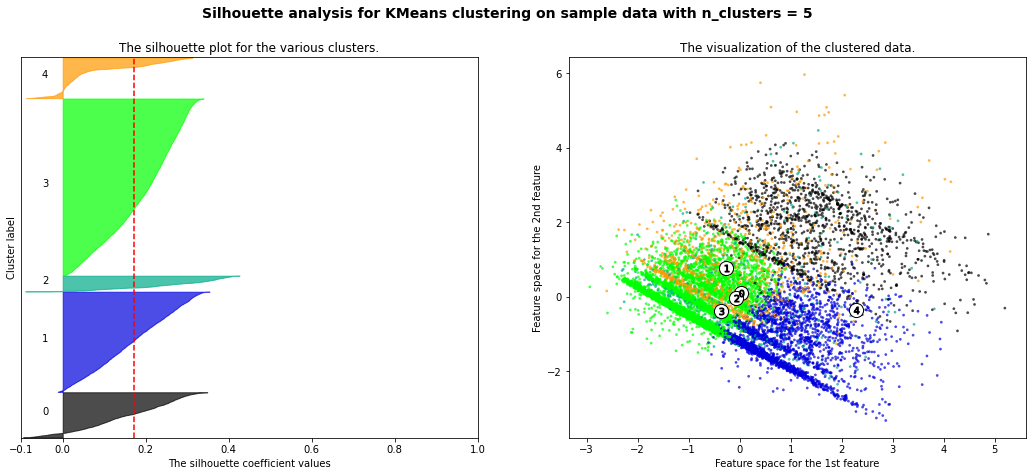

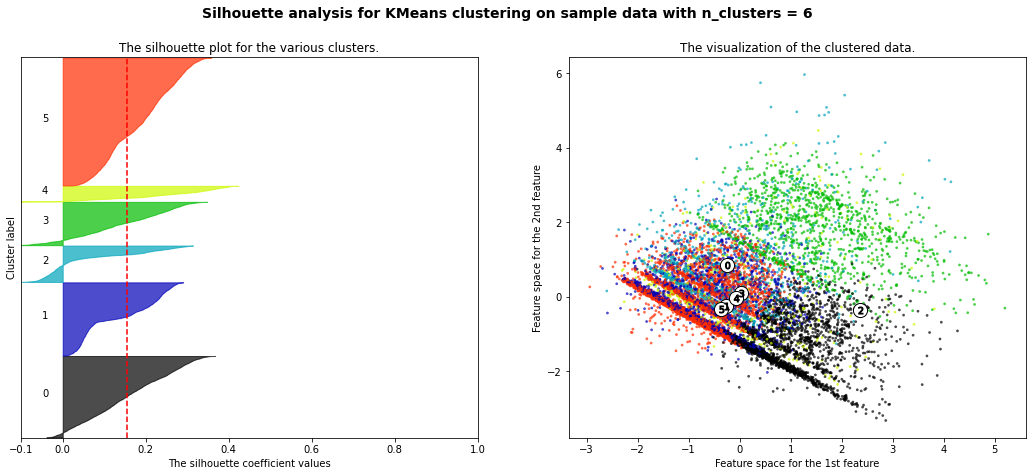

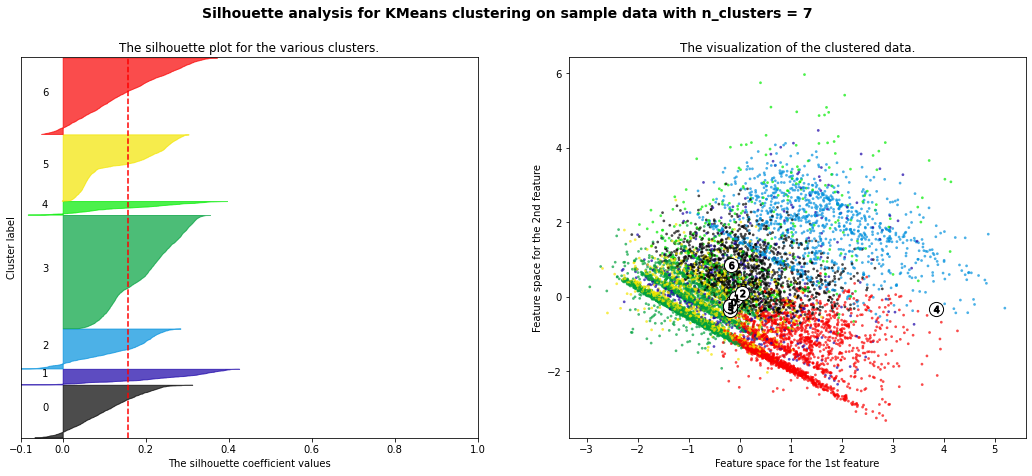

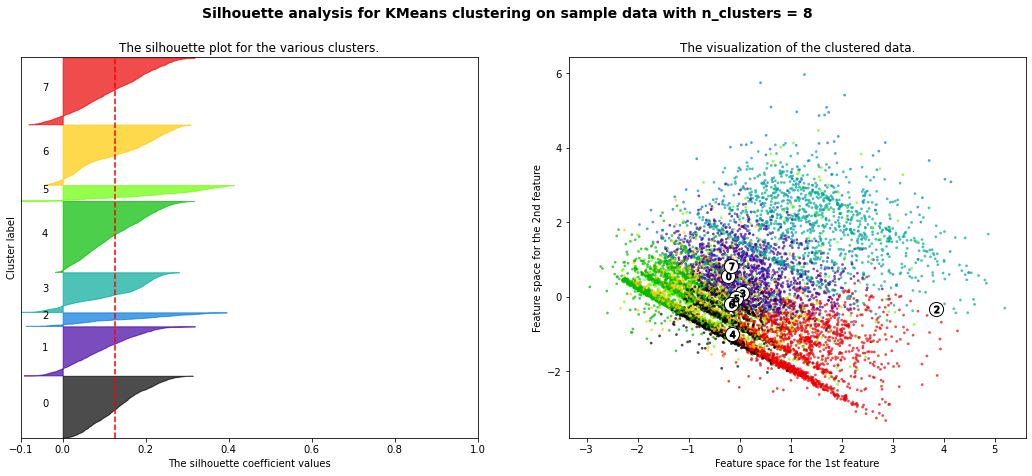

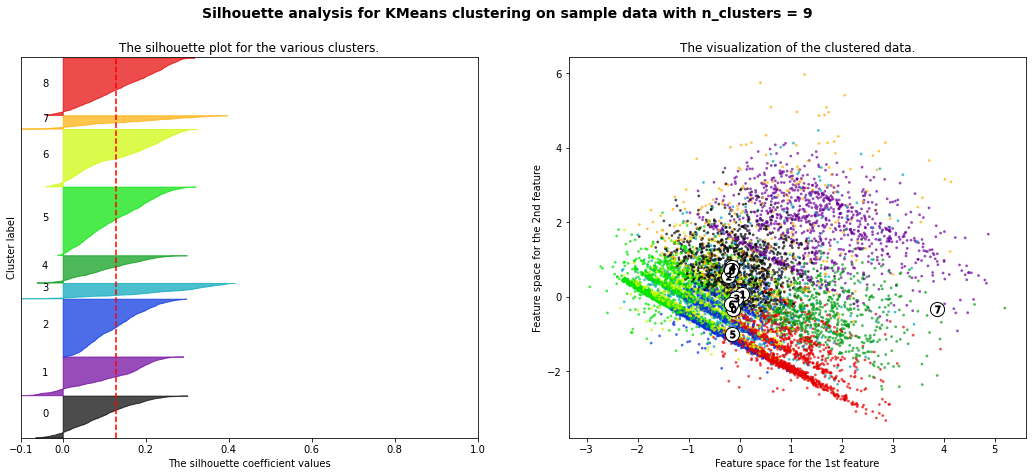

In [36]:
silhouette(model,X_init)

In [37]:
cls5 = cluster.KMeans(n_clusters = 5,random_state=0)
cls5.fit(X_norm)

X_init['numéro cluster'] = cls5.labels_

In [38]:
liste = np.arange(0,5)
clusters = {}
for elt in liste:
    clusters[f"cluster{elt}"] = X_init.loc[X_init['numéro cluster']==elt]

In [39]:
cluster0 = clusters['cluster0'].mean(axis = 0)
cluster1 = clusters['cluster1'].mean(axis = 0)
cluster2 = clusters['cluster2'].mean(axis = 0)
cluster3 = clusters['cluster3'].mean(axis = 0)
cluster4 = clusters['cluster4'].mean(axis = 0)

In [40]:
cluster = np.concatenate([[cluster0,cluster1,cluster2,cluster3,cluster4]])
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(cluster)
cluster = scaler.transform(cluster)
cluster = pd.DataFrame(cluster)

In [41]:
X_init

,nombre_achat_par_client,achat_moy,note,payment_installments,jour_achat,heure_de_achat,longeur_du_commentaire,numéro cluster
7869,1.0,5.672142,1.000000,1.000000,1.584963,4.459432,7.672425,4
59502,1.0,7.459350,2.584963,1.000000,2.807355,3.807355,4.906891,3
16356,1.0,3.884598,2.584963,1.000000,1.584963,4.584963,3.169925,3
4415,1.0,6.656782,2.584963,2.000000,2.807355,4.087463,5.459432,3
19140,1.0,4.906891,2.584963,1.000000,2.584963,4.459432,3.169925,3
...,...,...,...,...,...,...,...,...
33872,1.0,9.552669,1.000000,3.459432,2.321928,4.000000,5.459432,4
27876,1.0,6.599913,2.584963,1.584963,1.000000,4.087463,3.169925,1
48581,1.0,5.669594,2.584963,1.000000,0.000000,4.087463,3.169925,1
53835,1.0,5.906891,2.000000,1.000000,2.000000,3.906891,3.169925,3


In [42]:
cluster

,0,1,2,3,4,5,6,7
0,0.000000,1.000000,0.985918,1.000000,0.762778,1.000000,0.100441,0.00
1,0.093033,0.079271,0.999372,0.078068,0.000000,0.993857,0.054637,0.25
2,0.254503,0.254215,0.859295,0.323573,0.710407,0.000000,0.255255,0.50
3,0.063240,0.000000,1.000000,0.000000,1.000000,0.996969,0.000000,0.75
4,1.000000,0.347917,0.000000,0.302340,0.683068,0.990752,1.000000,1.00


In [43]:
cluster = cluster.rename(index={0: "clus0", 1: "clus1",2: "clus2", 3: "clus3",4:"clus4"})
cluster = cluster.rename(columns={0: "nombre_achat_par_client", 1: "achat_moy", 2: "note",
                                  3:"payment_installments",4:"jour_achat",5:"heure_de_achat",
                                  6:"longeur_du_commentaire",7:"numéro cluster"})

In [44]:
cluster = pd.DataFrame(cluster)

In [45]:
cluster

,nombre_achat_par_client,achat_moy,note,payment_installments,jour_achat,heure_de_achat,longeur_du_commentaire,numéro cluster
clus0,0.000000,1.000000,0.985918,1.000000,0.762778,1.000000,0.100441,0.00
clus1,0.093033,0.079271,0.999372,0.078068,0.000000,0.993857,0.054637,0.25
clus2,0.254503,0.254215,0.859295,0.323573,0.710407,0.000000,0.255255,0.50
clus3,0.063240,0.000000,1.000000,0.000000,1.000000,0.996969,0.000000,0.75
clus4,1.000000,0.347917,0.000000,0.302340,0.683068,0.990752,1.000000,1.00


#### Visualisation

In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go


categories = ["nombre_achat_par_client","achat_moy", "note",
              "payment_installments","jour_achat","heure_de_achat","longeur_du_commentaire"]


fig = make_subplots(rows=3, cols=3,specs=[[{'type': 'polar'}]*3]*3)

fig.add_trace(go.Scatterpolar(
      name = "cluster 0",
       r=cluster.iloc[0,:],
      theta = categories,
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
      name = "cluster 1",
       r=cluster.iloc[1,:],
      theta = categories,
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
      name = "cluster 2",
       r=cluster.iloc[2,:],
      theta = categories,
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
      name = "cluster 3",
       r=cluster.iloc[3,:],
      theta = categories,
    ), 2, 2)
fig.add_trace(go.Scatterpolar(
      name = "cluster 4",
       r=cluster.iloc[4,:],
      theta = categories,
    ), 3, 1)

In [48]:
categories =  ["nombre_achat_par_client","achat_moy", "note",
              "payment_installments","jour_achat","heure_de_achat","longeur_du_commentaire"]
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=cluster.iloc[0,:],
      theta=categories,
      fill='toself',
      name='cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=cluster.iloc[1,:],
      theta=categories,
      fill='toself',
      name='cluster 1'

))
fig.add_trace(go.Scatterpolar(
      r=cluster.iloc[2,:],
      theta=categories,
      fill='toself',
      name='cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=cluster.iloc[3,:],
      theta=categories,
      fill='toself',
      name='cluster 3'

))
fig.add_trace(go.Scatterpolar(
      r=cluster.iloc[4,:],
      theta=categories,
      fill='toself',
      name='cluster 4'

))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=True
)

fig.show()

<ul>
<li>cluster bleu : les acheteurs du weekend (très peu de commentaires, peu d'achats)
<li>cluster orange : les gros acheteurs (bonne note , paiement en plusieurs fois, gros achats)
<li>cluster vert : les clients achat unique (seulemnt 1 achat, très bonne note, pas de commentaire)
<li>cluster violet : les acheteurs pas contents (long commentaire, mauvaise note) 
<li>cluster rouge : les clients achats nombreux (beaucoup d'achats par client, notes moyennes, très peu de commentaire)
</ul>

#### Comparaisons du temps d'apprentissage et prediction avec gmm

In [49]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [50]:
def silhouette(model,df):

    print(__doc__)

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.

    pca.fit(df)
    X_pca = pca.transform(df)




    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (5 + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    
    clusterer = model(n_clusters=5, random_state=0)      ## if KMeans
    #clusterer = model(n_components=5, random_state=0)      ## if GMM
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", 5,
         "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    
    n_clusters = 5 
    for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_projected[:,0], X_projected[:,1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_        ### if GMM
    
    # Draw white circles at cluster centers
    
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',        ### if GMM
                    c="white", alpha=1, s=200, edgecolor='k')     ### if GMM

    for i, c in enumerate(centers):                                ### if GMM
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,          ### if GMM
                       s=50, edgecolor='k')                         ### if GMM

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()

In [55]:
model_K = KMeans

Automatically created module for IPython interactive environment
For n_clusters = 5 The average silhouette_score is : 0.30568348485873365


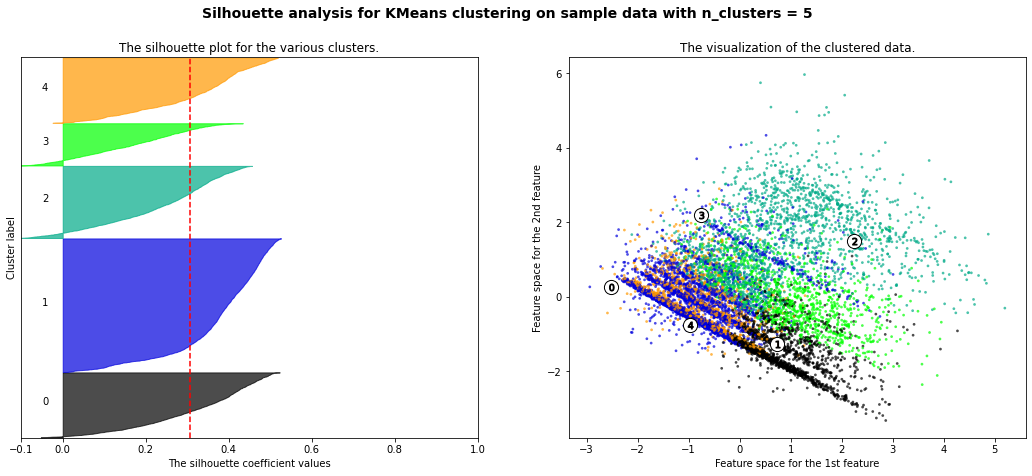

In [56]:
silhouette(model_K,X_init)

In [59]:
model_G = GaussianMixture

Automatically created module for IPython interactive environment


TypeError: __init__() got an unexpected keyword argument 'n_clusters'

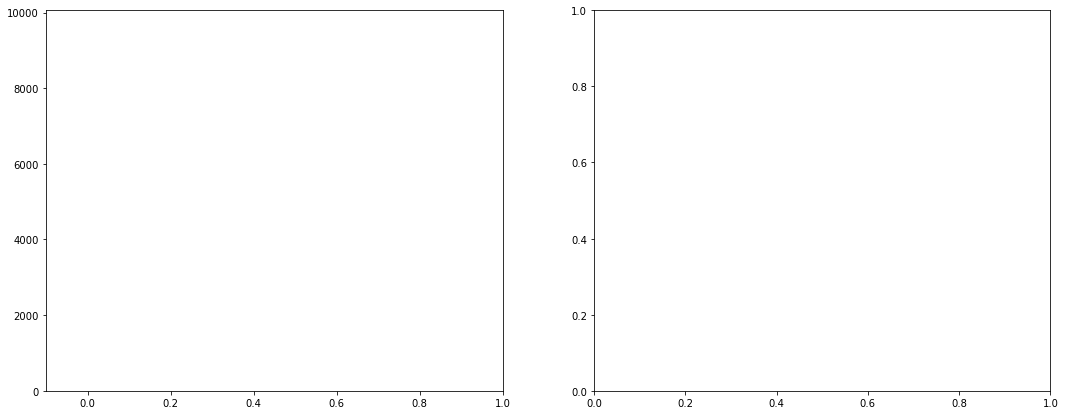

In [60]:
silhouette(model_G,X_init)

#### ARI : Adjusted Rand index (pour comparer les deux modèles)

In [61]:
from sklearn import metrics

kmeans = KMeans(n_clusters=5).fit(X_init).predict(X_init)
GMM = GaussianMixture(n_components=5).fit(X_init).predict(X_init)
print("le score ARI entre kmeans et GMM est de : " , 
      metrics.adjusted_rand_score(kmeans,GMM))

le score ARI entre kmeans et GMM est de :  0.5615466917442635


#### le faire 30 fois pour observer la variabilité de chaque modèle par rapport à un premier de reférence

In [62]:
import time
n = 0 
pred = KMeans(n_clusters = 5).fit(X_init).predict(X_init)   # modèle de ref
result = []
temps = []
while n < 30:
    start_time = time.time()
    pred_tps = KMeans(n_clusters = 5).fit(X_init).predict(X_init)
    start_end = (time.time() - start_time)
    result.append(metrics.adjusted_rand_score(pred,pred_tps))
    temps.append(start_end)
    n = n + 1 

In [63]:
n = 0 
pred = GaussianMixture(n_components=5).fit(X_init).predict(X_init)    # modèle de ref
result_1 = []
temps_1 = []
while n < 30:
    start_time = time.time()
    pred_tps = GaussianMixture(n_components=5).fit(X_init).predict(X_init)
    start_end = (time.time() - start_time)
    result_1.append(metrics.adjusted_rand_score(pred,pred_tps))
    temps_1.append(start_end)
    n = n + 1 

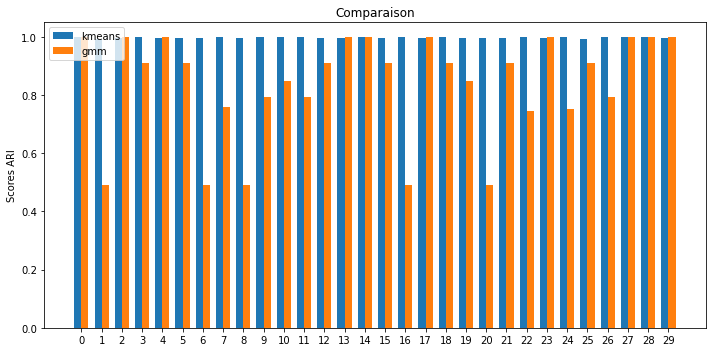

In [64]:
labels = ['0','1','2','3','4','5','6','7','8','9','10',
         '11','12','13','14','15','16','17','18','19',
         '20','21','22','23','24','25','26','27','28','29']
result
result_1

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, result, width, label='kmeans')
rects2 = ax.bar(x + width/2, result_1, width, label='gmm')

ax.set_ylabel('Scores ARI')
ax.set_title('Comparaison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

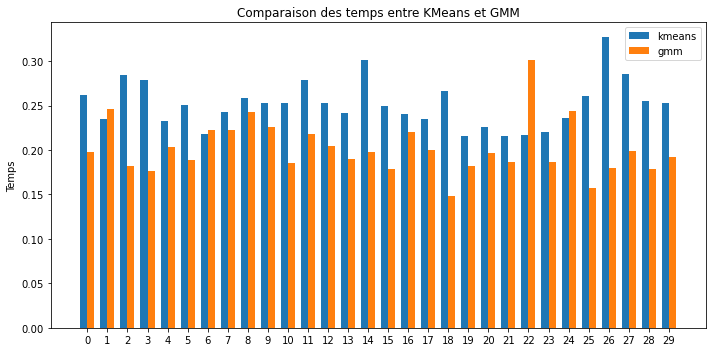

In [65]:
labels = ['0','1','2','3','4','5','6','7','8','9','10',
         '11','12','13','14','15','16','17','18','19',
         '20','21','22','23','24','25','26','27','28','29']
temps
temps_1

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, temps, width, label='kmeans')
rects2 = ax.bar(x + width/2, temps_1, width, label='gmm')

ax.set_ylabel('Temps')
ax.set_title('Comparaison des temps entre KMeans et GMM')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

Graphique recapitulatif

In [66]:
liste = [result,result_1,temps,temps_1]
recap = []
for elt in liste:
    bilan = np.mean (elt)
    recap.append(bilan)
    

In [67]:
recap

[0.9978671736083633,
 0.8382360512317035,
 0.25152812004089353,
 0.20179434617360434]

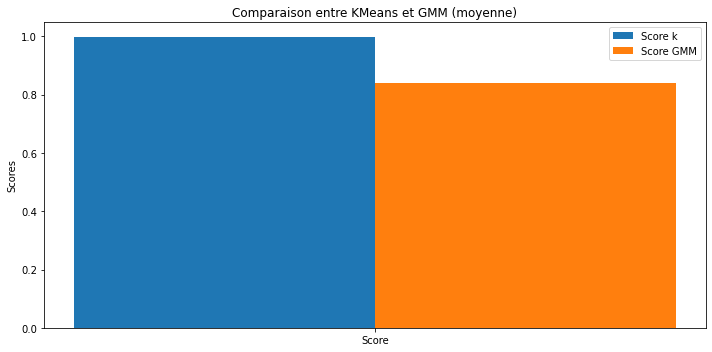

In [68]:
labels = ['Score']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, recap[0], width, label='Score k')
rects2 = ax.bar(x + width/2, recap[1], width, label='Score GMM')

ax.set_ylabel('Scores')
ax.set_title('Comparaison entre KMeans et GMM (moyenne)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

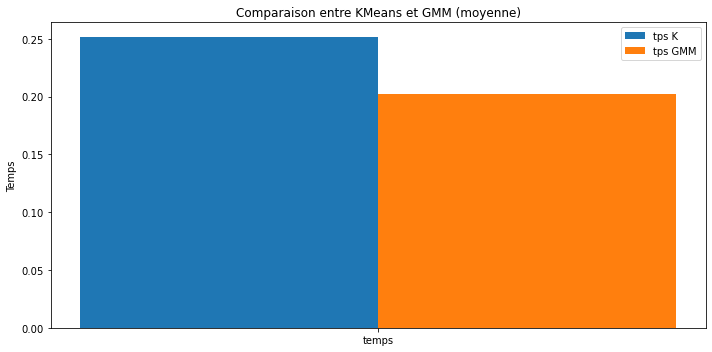

In [69]:
labels = ['temps']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects3 = ax.bar(x - width/2, recap[2], width, label='tps K')
rects4 = ax.bar(x + width/2, recap[3], width, label='tps GMM')

ax.set_ylabel('Temps')
ax.set_title('Comparaison entre KMeans et GMM (moyenne)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



fig.tight_layout()

plt.show()

#### Devis de contrat de maintenance

In [71]:
customers = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_customers_dataset.csv')
geolocalisation = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_geolocation_dataset.csv')
order_items = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_items_dataset.csv')
order_payments = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_order_reviews_dataset.csv')
orders = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_orders_dataset.csv')
products = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_products_dataset.csv')
sellers = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/olist_sellers_dataset.csv')
translation = pd.read_csv('C:/Users/Elisée/Desktop/Projet (5)/archive/product_category_name_translation.csv')

In [72]:
commandes = pd.merge(pd.merge(pd.merge(orders,order_items,on='order_id'),order_payments,on='order_id'),
                     order_reviews,on='order_id')
commandes = pd.merge(commandes,products,on='product_id')
df = pd.merge(customers,commandes,on='customer_id')
print(df.shape)
#df['date'] = df['order_delivered_carrier_date'] 
#df = df.set_index(pd.DatetimeIndex(df['order_delivered_carrier_date']))


(118315, 36)


In [73]:
def devis_mainteance(df,time):
      
    ## nettoyage

    
    df['review_comment_message'].fillna("no comme", inplace=True)
    df =df.drop(['review_comment_title'],axis=1)
    df = df.dropna()
    #print(df.shape)
    #print("le nombre de valeur identifiant unique : ", df['customer_unique_id'].nunique())
    df['date'] = df['order_delivered_carrier_date']


    
    
    #feature engineer
    
    # date 
    date = df[['customer_unique_id','date']]
    
    # achat moyen 
    
    achat_moy = df[['customer_unique_id','price']].groupby(['customer_unique_id']).mean()
    achat_moy = achat_moy.rename(columns = {'price': 'achat_moy'})
    achat_moy = achat_moy.reset_index()
    #print("le nombre de valeur identifiant unique : ",achat_moy['customer_unique_id'].nunique())
    #print(achat_moy.shape)
    
    
    # nombre d'achat
    
    nombre_achat_par_client = df[['customer_unique_id','product_id']].groupby(['customer_unique_id']).count()
    nombre_achat_par_client = nombre_achat_par_client.rename(columns = {'product_id': 'nombre_achat_par_client'})
    nombre_achat_par_client = nombre_achat_par_client.reset_index()
    #print("le nombre de valeur identifiant unique : ",nombre_achat_par_client['customer_unique_id'].nunique())
    #print(nombre_achat_par_client.shape)
    
    # note moyenne 
    
    note_moyenne = df[['customer_unique_id','review_score']].groupby(['customer_unique_id']).mean()
    note_moyenne = note_moyenne.rename(columns = {'review_score': 'note'})
    note_moyenne = note_moyenne.reset_index()
    #print("le nombre de valeur identifiant unique : ",note_moyenne['customer_unique_id'].nunique())
    
    #type de paiment
    
    type_de_paiment = df[['customer_unique_id','payment_type']].groupby([
        'customer_unique_id'])['payment_type'].apply(lambda x: x.mode()[0])
    type_de_paiment = pd.DataFrame(type_de_paiment)
    type_de_paiment = type_de_paiment.reset_index()
    #print("le nombre de valeur identifiant unique : ",type_de_paiment['customer_unique_id'].nunique())
    
    
    # le client paie en combien de fois 
    divise_le_paiment = df[['customer_unique_id','payment_installments']].groupby(['customer_unique_id']).mean()
    divise_le_paiment = divise_le_paiment.reset_index()
    #print("le nombre de valeur identifiant unique : ",divise_le_paiment['customer_unique_id'].nunique())
    
    
    # les villes où l'on achete 
    ville = df[['customer_unique_id','customer_city']].groupby([
        'customer_unique_id'])['customer_city'].apply(lambda x: x.mode()[0])
    ville = pd.DataFrame(ville)
    ville = ville.reset_index()
    #print("le nombre de valeur identifiant unique : ",ville['customer_unique_id'].nunique())
    #print(ville.shape)
    
    # les etat où l'on achette le plus 
    etat = df[['customer_unique_id','customer_state']].groupby([
        'customer_unique_id'])['customer_state'].apply(lambda x: x.mode()[0])
    etat = pd.DataFrame(etat)    
    etat = etat.reset_index()
    #print("le nombre de valeur identifiant unique : ",etat['customer_unique_id'].nunique())
    
    # delais de la commande 
    delai_commande = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
        'customer_unique_id']).head(5)
    delai_commande['order_purchase_timestamp'] = delai_commande['order_purchase_timestamp'].astype('datetime64')
    delai_commande['order_delivered_customer_date'] = pd.to_datetime(delai_commande['order_delivered_customer_date'], 
                                                                     errors='coerce')
    delai_commande['delai_commande'] = delai_commande['order_delivered_customer_date']- delai_commande[
        'order_purchase_timestamp']
    delai_commande = delai_commande.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    #print(delai_commande.shape)
    #print("le nombre de valeur identifiant unique : ",delai_commande['customer_unique_id'].nunique())
    
    #le jour de la semaine
    jour_achat = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
    'customer_unique_id']).head(5)
    jour_achat['order_purchase_timestamp'] = jour_achat['order_purchase_timestamp'].astype('datetime64')
    jour_achat['jour_achat'] = jour_achat['order_purchase_timestamp'].apply(lambda x: x.weekday())
    jour_achat = jour_achat.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    #print("le nombre de valeur identifiant unique : ",jour_achat['customer_unique_id'].nunique())
    #print(jour_achat.shape)
    
    #heure achat
    
    heure_achat = df[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby([
    'customer_unique_id']).head(5)
    heure_achat['order_purchase_timestamp'] = heure_achat['order_purchase_timestamp'].astype('datetime64')
    heure_achat['heure_de_achat'] = heure_achat['order_purchase_timestamp'].apply(lambda x: x.hour)
    heure_achat = heure_achat.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)
    #print("le nombre de valeur identifiant unique : ",heure_achat['customer_unique_id'].nunique())
    #print(heure_achat.shape)
    
    # taille du commentaire 
    
    for label, row in df.iterrows():
        df.loc[label, 'longeur_du_commentaire'] =len(row['review_comment_message'])
    taille_commentaire = df[['customer_unique_id','longeur_du_commentaire']].groupby(['customer_unique_id']).mean()
    taille_commentaire = taille_commentaire.reset_index()
    #print("le nombre de valeur identifiant unique : ",taille_commentaire['customer_unique_id'].nunique())
    
    #produit le plus acheté 
    
    produit_le_plus_acheté = df[['customer_unique_id','product_category_name']].groupby([
        'customer_unique_id'])['product_category_name'].apply(lambda x: x.mode()[0])
    produit_le_plus_acheté = pd.DataFrame(produit_le_plus_acheté)
    produit_le_plus_acheté = produit_le_plus_acheté.reset_index()
    #print("le nombre de valeur identifiant unique : ",produit_le_plus_acheté['customer_unique_id'].nunique())
    #print(produit_le_plus_acheté.shape)
    
    ### Rassembler 
    
    df_f = nombre_achat_par_client.merge(achat_moy)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(note_moyenne)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(type_de_paiment)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(divise_le_paiment)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(ville)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(etat)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(delai_commande)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(jour_achat)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(heure_achat)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(taille_commentaire)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(produit_le_plus_acheté)
    #print(df_f['customer_unique_id'].nunique())
    df_f = df_f.merge(date)
    
    # un client par ligne
  
    df_f = df_f.drop_duplicates(['customer_unique_id'])
    
    # Garder seulement les variables quantitative pour KMeans

    df_f = df_f.drop(['customer_state','customer_city',
            'customer_unique_id','delai_commande','payment_type',
                     'product_category_name'],axis=1) 
    
    df_f = df_f.set_index(pd.DatetimeIndex(df_f['date']))
    df_f = df_f.loc['2016-10' : time]
    # Passer au log 
    df_f['achat_moy'] = np.log2(1+df_f['achat_moy'])
    df_f['note'] = np.log2(1+df_f['note'])
    df_f['jour_achat'] = np.log2(1+df_f['jour_achat'])
    df_f['heure_de_achat'] = np.log2(1+df_f['heure_de_achat'])
    df_f['payment_installments'] = np.log2(1+df_f['payment_installments'])
    df_f['nombre_achat_par_client'] = np.log2(1+df_f['nombre_achat_par_client'])
    df_f['longeur_du_commentaire'] = np.log2(1+df_f['longeur_du_commentaire'])
    
    
    return df_f

###### Récupérer les données (features) en filtrant par mois. (1 an, 1an 1mois, 1an 2mois ... )

In [ ]:
liste = '2017-10','2017-11','2017-12','2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09'
data = {}
for time in liste: 
    data[f"dat{time}"] = devis_mainteance(df,time)

###### faire KMeans pour toutes les périodes

In [76]:
liste = 'dat2017-10','dat2017-11','dat2017-12','dat2018-01','dat2018-02','dat2018-03','dat2018-04','dat2018-05','dat2018-06','dat2018-07','dat2018-08','dat2018-09'
date = {}
for elt in liste:
    date[f"{elt}"] = pd.DataFrame(data[elt]['date'])

In [77]:
données = {}
for elt in liste:
    données[f"{elt}"] = data[elt].drop(['date'],axis=1)

In [78]:
pred = {}
for elt in liste:
    #kmeans
    #pred[f"{elt}"] = pd.DataFrame(KMeans(n_clusters = 5,random_state=0).fit(données[elt]).predict(données[elt]))
    #gmm
    pred[f"{elt}"] = pd.DataFrame(GaussianMixture(n_components=5,random_state=0).fit(données[elt]).predict(données[elt]))

In [79]:
final = {}
finale = {}
for elt in liste:
    final[f"{elt}"] = pd.DataFrame(np.concatenate([date[elt],données[elt]],axis=1))
    finale[f"{elt}"] = pd.DataFrame(np.concatenate([final[elt],pred[elt]],axis=1))
    finale[f"{elt}"] = finale[elt].set_index(pd.DatetimeIndex(finale[elt][0]))
    finale[f"{elt}"] = finale[elt].drop([0],axis=1)
    finale[f"{elt}"] = finale[elt].loc['2016-10' : '2017-10' ]
    finale[f"{elt}"] = finale[elt][8].to_numpy()
    #print(finale[elt].shape)

###### Comparer toutes les périodes avec la première année et voir la stabilité grâce à l'ARI

In [80]:
resultats = []
liste = 'dat2017-11','dat2017-12','dat2018-01','dat2018-02','dat2018-03','dat2018-04','dat2018-05','dat2018-06','dat2018-07','dat2018-08','dat2018-09'
for elt in liste :
    score  = metrics.adjusted_rand_score(finale['dat2017-10'],finale[elt])
    resultats.append(score)

Text(0, 0.5, 'Score ARI')

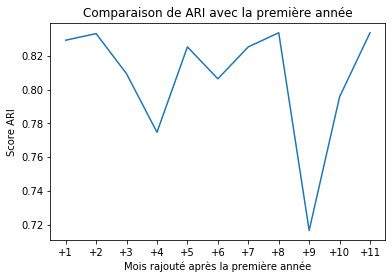

In [81]:
t = np.arange(0,11)
plt.plot(resultats)
plt.xticks(range(11), ['+1', '+2', '+3', '+4', '+5','+6', '+7',
                       '+8', '+9', '+10','+11'])
plt.title('Comparaison de ARI avec la première année')
plt.xlabel('Mois rajouté après la première année')
plt.ylabel('Score ARI')